# Scikit-Image Demonstration

This notebook demonstrates key image processing techniques using the **scikit-image** library.

### Load Image

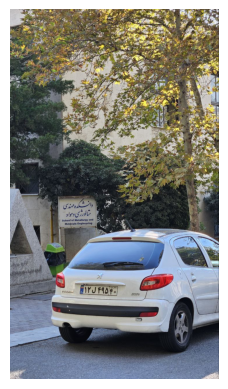

In [2]:
import matplotlib.pyplot as plt
from skimage import io

image_path = '1.jpg'
image = io.imread(image_path)

plt.imshow(image)
plt.axis('off')
plt.show()


### Convert Image to Grayscale

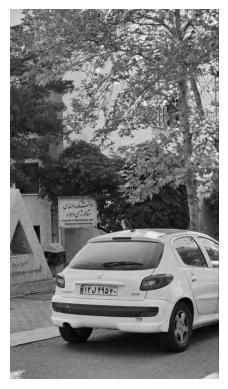

In [3]:
import matplotlib.pyplot as plt
from skimage import io
from skimage.color import rgb2gray

image = io.imread(image_path)
gray_image = rgb2gray(image)

plt.imshow(gray_image, cmap='gray')
plt.axis('off')
plt.show()


### Apply Gaussian Blur

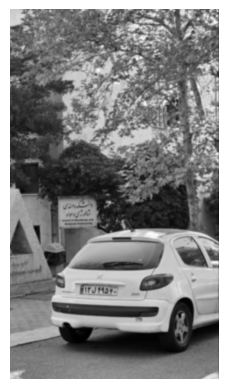

In [4]:
import matplotlib.pyplot as plt
from skimage import io
from skimage.color import rgb2gray
from skimage.filters import gaussian

image = io.imread(image_path)
gray_image = rgb2gray(image)

blurred_image = gaussian(gray_image, sigma=2)

plt.imshow(blurred_image, cmap='gray')
plt.axis('off')
plt.show()


### Perform Edge Detection (Sobel Filter)

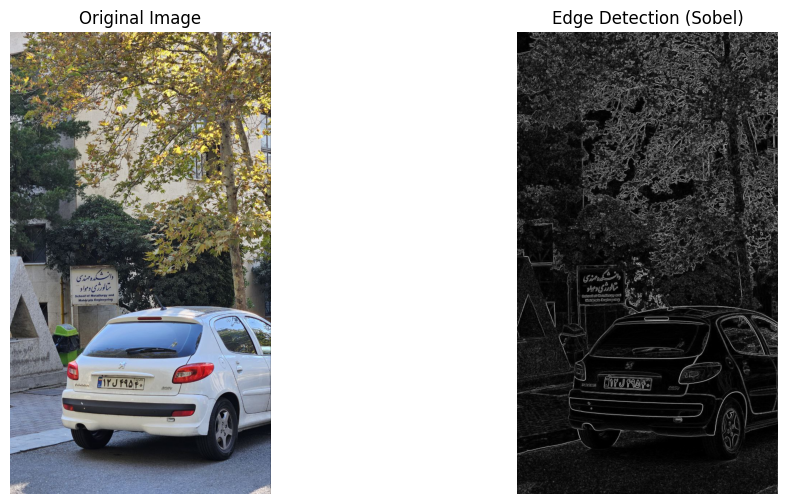

In [5]:
import matplotlib.pyplot as plt
from skimage import io
from skimage.color import rgb2gray
from skimage.filters import sobel

image = io.imread(image_path)
gray_image = rgb2gray(image)

edges = sobel(gray_image)

fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].imshow(image)
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].imshow(edges, cmap='gray')
ax[1].set_title('Edge Detection (Sobel)')
ax[1].axis('off')

plt.show()


### Segment Image using Otsu Thresholding

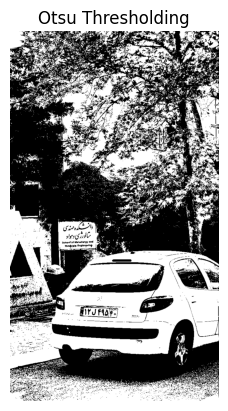

In [6]:
import matplotlib.pyplot as plt
from skimage import io
from skimage.color import rgb2gray
from skimage.filters import threshold_otsu

image = io.imread(image_path)
gray_image = rgb2gray(image)

threshold = threshold_otsu(gray_image)
binary_image = gray_image > threshold

plt.imshow(binary_image, cmap='gray')
plt.title('Otsu Thresholding')
plt.axis('off')
plt.show()


### Perform Watershed Segmentation

The watershed algorithm is a region-based technique inspired by topography. The idea is that the image is treated as a topographic surface, where pixel intensities represent elevation. The algorithm then simulates flooding of the surface, with markers placed in the "valleys" (low-intensity regions), to separate different objects (regions).

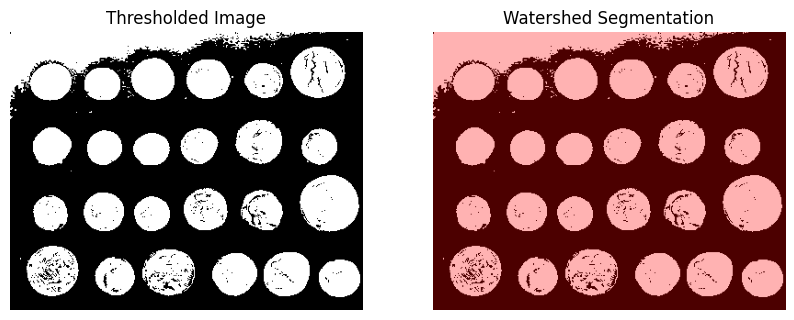

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, filters, morphology, segmentation, color
from scipy import ndimage as ndi

image = data.coins()

# Threshold the image to create a binary image
image = image > filters.threshold_otsu(image)

# Compute the distance transform of the binary image
distance = ndi.distance_transform_edt(image)

# Create markers for the watershed algorithm
markers = np.zeros_like(image)
markers[distance < 30] = 1  # Marker for background
markers[distance > 70] = 2  # Marker for foreground

# Apply the watershed algorithm
labels = segmentation.watershed(-distance, markers)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].imshow(image, cmap='gray')
ax[0].set_title('Thresholded Image')
ax[0].axis('off')

ax[1].imshow(color.label2rgb(labels, image=image), cmap='nipy_spectral')
ax[1].set_title('Watershed Segmentation')
ax[1].axis('off')

plt.show()


### Corner Detection (Harris Corner)

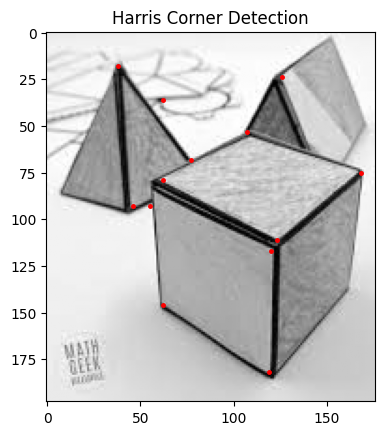

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, color
from skimage.feature import corner_harris, corner_peaks
from skimage import io


image = io.imread('shapes.jpeg')
gray_image = color.rgb2gray(image)

# Harris corner detection
corners = corner_harris(gray_image)
corner_coords = corner_peaks(corners, min_distance=5, threshold_rel=0.1)

fig, ax = plt.subplots()
ax.imshow(gray_image, cmap='gray')
ax.plot(corner_coords[:, 1], corner_coords[:, 0], 'r.', markersize=5)
ax.set_title('Harris Corner Detection')
plt.show()


### HOG

This a feature descriptor used in computer vision and image processing to capture the structure or shape of objects within an image. It is widely used in tasks such as object detection (e.g., detecting pedestrians, faces, or other objects) and image recognition. HOG focuses on capturing the gradient information in localized regions of an image, which is crucial for detecting object edges and shapes.

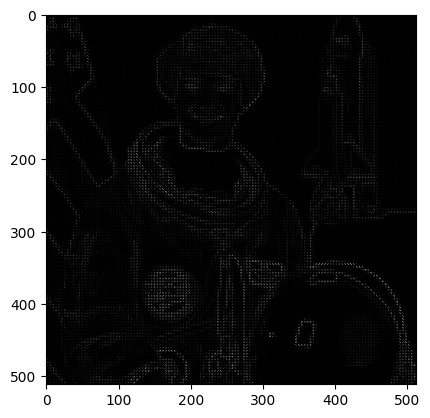

In [25]:
import matplotlib.pyplot as plt
from skimage import data, color, exposure, feature

# Load a sample image
image = data.astronaut()
gray_image = color.rgb2gray(image)

# Experiment with different HOG parameters
features, hog_image = feature.hog(gray_image, 
                                  orientations=8, 
                                  pixels_per_cell=(4, 4), 
                                  cells_per_block=(4, 4), 
                                  visualize=True, 
                                  block_norm='L2-Hys')

# Enhance the HOG image for better visualization
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

# Display the rescaled HOG image
fig, ax = plt.subplots()
ax.imshow(hog_image_rescaled, cmap='gray')
plt.show()


### Dilation

Dilation expands object boundaries in a binary image, useful for filling small holes.

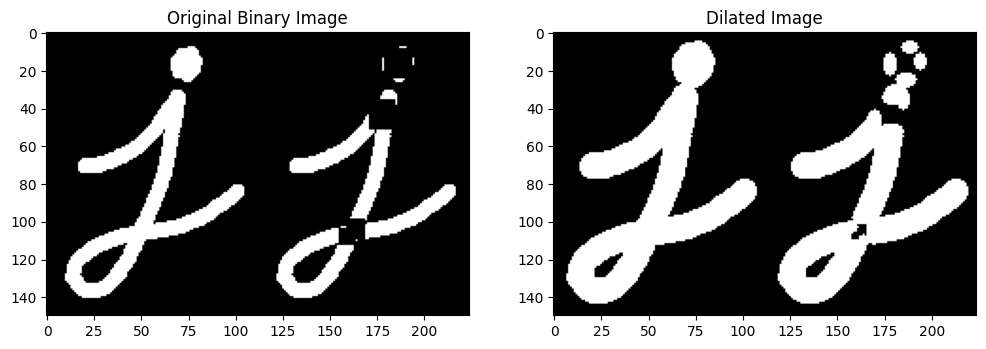

In [27]:
from skimage.morphology import dilation, disk
from skimage import io, data
from skimage.color import rgb2gray
import matplotlib.pyplot as plt


image = io.imread('j.png')
gray_image = rgb2gray(image)
binary_image = gray_image > 0.5

# Apply dilation
dilated_image = dilation(binary_image, disk(3))

fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(binary_image, cmap='gray')
ax[0].set_title('Original Binary Image')
ax[1].imshow(dilated_image, cmap='gray')
ax[1].set_title('Dilated Image')
plt.show()


### Erosion
Erosion shrinks object boundaries, often used to remove noise.

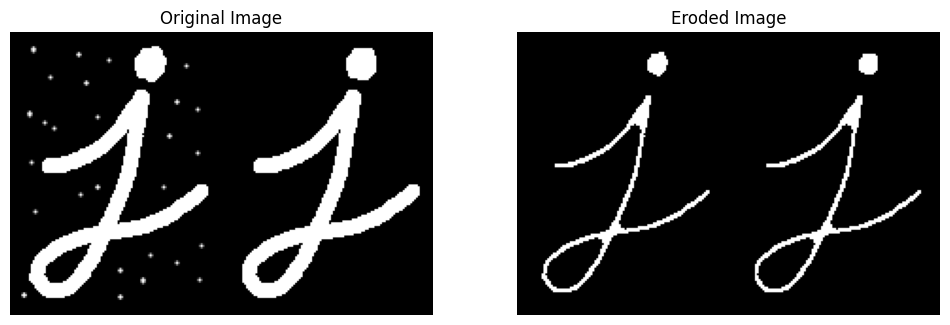

In [ ]:
from skimage.morphology import erosion, disk
from skimage import io
import numpy as np
import matplotlib.pyplot as plt


image = io.imread('j-noise.png')


if len(image.shape) == 2:
    gray_image = image
else:
    from skimage.color import rgb2gray
    gray_image = rgb2gray(image)

binary_image = gray_image > 0.5

# Apply erosion
eroded_image = erosion(binary_image, disk(3))

fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(gray_image, cmap='gray')
ax[0].set_title('Original Image')
ax[0].axis('off')
ax[1].imshow(eroded_image, cmap='gray')
ax[1].set_title('Eroded Image')
ax[1].axis('off')

plt.show()


### Rotation

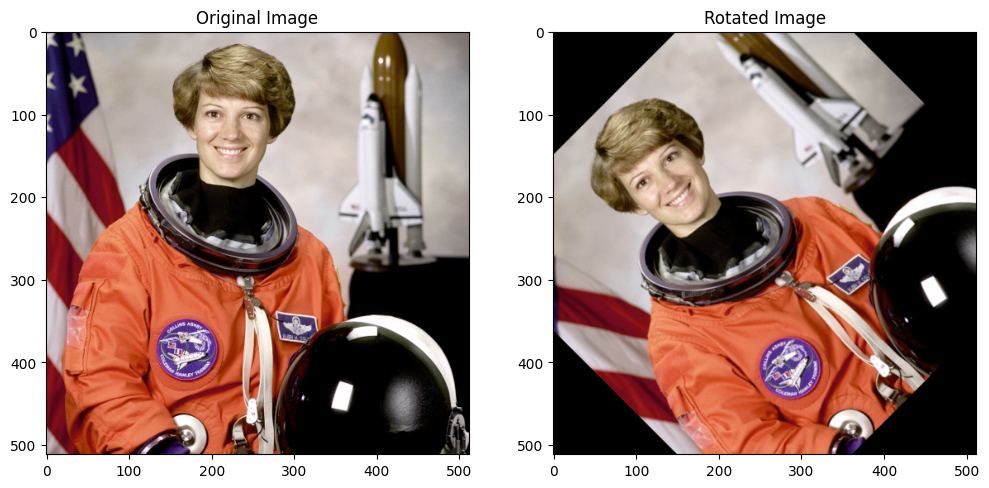

In [34]:
from skimage.transform import rotate

image = data.astronaut()
rotated_image = rotate(image, angle=45)

fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(image)
ax[0].set_title('Original Image')
ax[1].imshow(rotated_image)
ax[1].set_title('Rotated Image')
plt.show()


### Affine Transformation

Here the image is scaled.

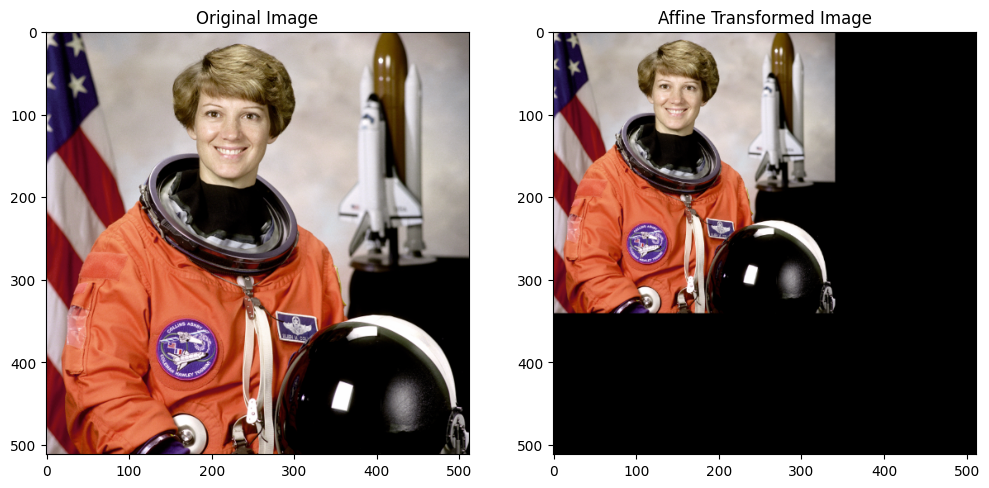

In [ ]:
from skimage.transform import AffineTransform, warp

image = data.astronaut()

affine = AffineTransform(scale=(1.5, 1.5))
transformed_image = warp(image, affine)

fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(image)
ax[0].set_title('Original Image')
ax[1].imshow(transformed_image)
ax[1].set_title('Affine Transformed Image')
plt.show()


### Extract Region Properties

In [37]:
from skimage.measure import regionprops, label

labeled_image = label(binary_image)
properties = regionprops(labeled_image)

for region in properties:
    print(f"Region {region.label}: Area = {region.area}, Perimeter = {region.perimeter}")


Region 1: Area = 12.0, Perimeter = 10.0
Region 2: Area = 245.0, Perimeter = 56.87005768508881
Region 3: Area = 233.0, Perimeter = 54.384776310850235
Region 4: Area = 9.0, Perimeter = 8.0
Region 5: Area = 9.0, Perimeter = 8.0
Region 6: Area = 9.0, Perimeter = 8.0
Region 7: Area = 9.0, Perimeter = 8.0
Region 8: Area = 9.0, Perimeter = 8.0
Region 9: Area = 2331.0, Perimeter = 587.3696244092002
Region 10: Area = 2326.0, Perimeter = 585.7127701597078
Region 11: Area = 9.0, Perimeter = 8.0
Region 12: Area = 9.0, Perimeter = 8.0
Region 13: Area = 12.0, Perimeter = 10.0
Region 14: Area = 9.0, Perimeter = 8.0
Region 15: Area = 9.0, Perimeter = 8.0
Region 16: Area = 9.0, Perimeter = 8.0
Region 17: Area = 9.0, Perimeter = 8.0
Region 18: Area = 9.0, Perimeter = 8.0
Region 19: Area = 9.0, Perimeter = 8.0
Region 20: Area = 9.0, Perimeter = 8.0
Region 21: Area = 9.0, Perimeter = 8.0
Region 22: Area = 9.0, Perimeter = 8.0
Region 23: Area = 9.0, Perimeter = 8.0
Region 24: Area = 9.0, Perimeter = 8.0
Re

Shift: [0. 0.]


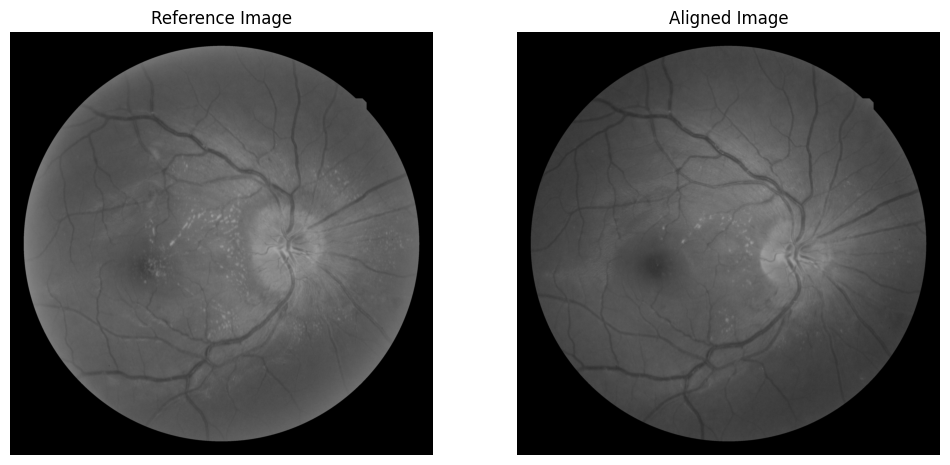

In [50]:
from skimage.registration import phase_cross_correlation
from skimage import io
import numpy as np
import matplotlib.pyplot as plt
from skimage.transform import resize


image1 = io.imread('A01_1.jpg')  # Reference image
image2 = io.imread('A01_2.jpg')  # Image to align


if len(image1.shape) == 3:
    from skimage.color import rgb2gray
    image1 = rgb2gray(image1)
    image2 = rgb2gray(image2)


if image1.shape != image2.shape:
    image2 = resize(image2, image1.shape, anti_aliasing=True)

# Perform phase cross-correlation to compute the shift
shift, error, diffphase = phase_cross_correlation(image1, image2)


print(f"Shift: {shift}")


from skimage.transform import warp
from skimage.transform import AffineTransform


transform = AffineTransform(translation=shift)
aligned_image = warp(image2, transform)

fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(image1, cmap='gray')
ax[0].set_title('Reference Image')
ax[0].axis('off')
ax[1].imshow(aligned_image, cmap='gray')
ax[1].set_title('Aligned Image')
ax[1].axis('off')

plt.show()


### Deconvolution

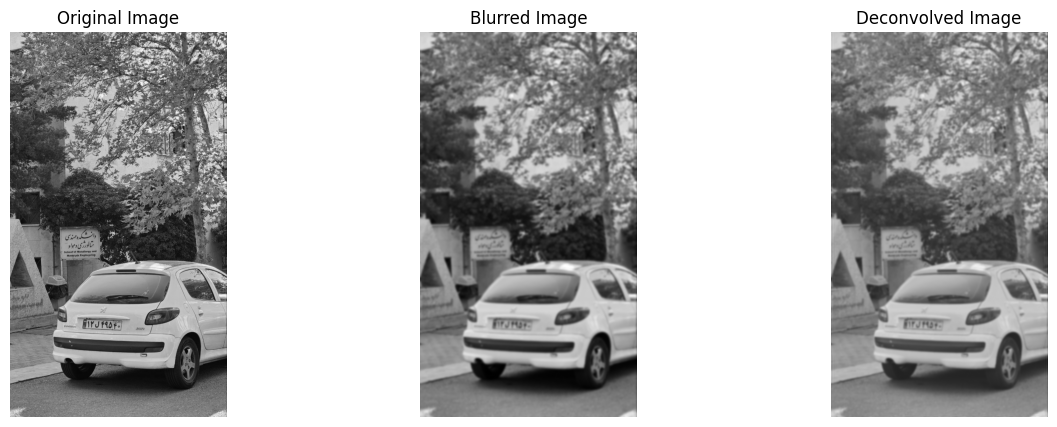

In [54]:
from skimage import io
import numpy as np
import matplotlib.pyplot as plt
from skimage.restoration import wiener
from skimage.filters import gaussian
from skimage.color import rgb2gray


image = io.imread(image_path)

if len(image.shape) == 3:
    image = rgb2gray(image)


blurred_image = gaussian(image, sigma=3)

psf = np.ones((5, 5)) / 25

#Deconvolve the blurred image using Wiener filter
deconvolved_image = wiener(blurred_image, psf, balance=0.1)

fig, ax = plt.subplots(1, 3, figsize=(15, 5))

ax[0].imshow(image, cmap='gray')
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].imshow(blurred_image, cmap='gray')
ax[1].set_title('Blurred Image')
ax[1].axis('off')

ax[2].imshow(deconvolved_image, cmap='gray')
ax[2].set_title('Deconvolved Image')
ax[2].axis('off')

plt.show()
